#  Heart Disease Predictive Model
By: Sparkle Russell-Puleri,Ph.D.

This data was obtained from Cleveland Clinic Foundation (obtained from the UCI machine learning repository). The purpose of this project is to develop a model that predicts the presence or absence of heart disease in a patient. While the databases have 76
raw attributes, only 14 of them are actually used. They include:

**Attribute Information:**
<dd>.1.**Age**: Age in years     
<dd>2.**Sex**:Sex (1 = male; 0 = female)         
<dd>3.**cp**: Chest pain type</dd>   
<dd>    -- Value 1: typical angina</dd>   
<dd>    -- Value 2: atypical angina</dd>   
        -- Value 3: non-anginal pain</dd>   
        -- Value 4: asymptomatic</dd>        
4.**trestbps**: Resting blood pressure (in mm Hg on admission to the hospital)</dd>   
5.**chol**:Serum cholestoral in mg/dl</dd>       
6.**fbs**:Fasting blood sugar > 120 mg/dl(1 = true; 0 = false)</dd>         
7.**restecg**:Resting electrocardiographic results</dd>   
        -- Value 0: normal</dd>   
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)</dd>   
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria</dd>      
8.**thalach**:Maximum heart rate achieved</dd>     
9.**exang**:Exercise induced angina (1 = yes; 0 = no)</dd>     
10.**oldpeak**:ST depression induced by exercise relative to rest</dd>     
11.**slope**:slope of the peak exercise ST segment</dd>   
        -- Value 1: upsloping</dd>   
        -- Value 2: flat</dd>   
        -- Value 3: downsloping</dd>        
12.**ca**:number of major vessels (0-3) colored by flourosopy</dd>        
13.**thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect</dd>         
14.**num(the predicted attribute)**: diagnosis of heart disease (angiographic disease status)</dd>   
        -- Value 0: < 50% diameter narrowing</dd>   
        -- Value 1: > 50% diameter narrowing</dd>   
        (in any major vessel: attributes 59 through 68 are vessels)</dd>         

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data and Explore the Dataset

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

In [3]:
data = pd.read_csv(url,names=['Age','Sex','cp','restbps','chol','fbs','restecg','thalach','exang',
                              'oldpeak','slope','ca','thal','Target=num'])

In [4]:
data.head()

,Age,Sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Target=num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Age           303 non-null float64
Sex           303 non-null float64
cp            303 non-null float64
restbps       303 non-null float64
chol          303 non-null float64
fbs           303 non-null float64
restecg       303 non-null float64
thalach       303 non-null float64
exang         303 non-null float64
oldpeak       303 non-null float64
slope         303 non-null float64
ca            303 non-null object
thal          303 non-null object
Target=num    303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


# Observations: 
Attributes ca and thal were listed as object types. However they are numeric values ( as seen when we explored the head of the dataframe), so we will be converting them to numeric values before we proceed using the pandas to numeric method. This can also be a sign of missing values, characterized with a string which I will look for using a heatmap.

In [6]:
data.describe()

,Age,Sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,Target=num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


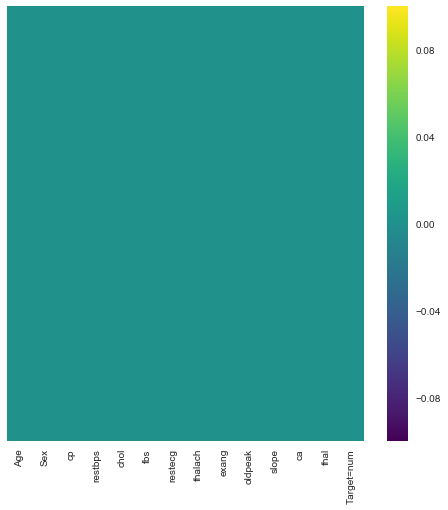

In [7]:
# Checking for missing Data
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

# Observations:
We can see from the heatmap above that the dataset contains some missing values for attributes ca and thal. We will use scikit-learn's imputer function impute the missing data using the frequency of the data the respective columns( because both columns contain categorical data). 

# Clean Data

In [8]:
data[['ca','thal']].tail()

,ca,thal
298,0.0,7.0
299,2.0,7.0
300,1.0,7.0
301,1.0,3.0
302,?,3.0


In [9]:
# Convert objects to floats
data['ca']=pd.to_numeric(data['ca'],errors='coerce')
data['thal']=pd.to_numeric(data['thal'],errors='coerce')

In [10]:
# Check the data frame again to make sure the data types are correctly assigned.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Age           303 non-null float64
Sex           303 non-null float64
cp            303 non-null float64
restbps       303 non-null float64
chol          303 non-null float64
fbs           303 non-null float64
restecg       303 non-null float64
thalach       303 non-null float64
exang         303 non-null float64
oldpeak       303 non-null float64
slope         303 non-null float64
ca            299 non-null float64
thal          301 non-null float64
Target=num    303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.2 KB


In [11]:
# Remove missing data str ? with the NaN value that the imputer function recognizes
# Check the data to ensure that the str values were converted to NaN values

data[['ca','thal']].replace(to_replace='?',value='NaN').tail()

,ca,thal
298,0.0,7.0
299,2.0,7.0
300,1.0,7.0
301,1.0,3.0
302,NaN,3.0


# Missing Data:
Imputed based on frequency as the missing data points were catergorical

In [12]:
from sklearn.preprocessing import Imputer

In [13]:
imputer = Imputer(missing_values='NaN',strategy='most_frequent',axis=0)

In [14]:
# Store the two columns that contain missing data in data_impute dataframe


In [15]:
# Fit the imputer object to the dataframe
imputer.fit(data.iloc[:, 10:13].values)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='most_frequent',
    verbose=0)

In [16]:
# Transform the imputed data in the dataframe
data.iloc[:, 10:13] = imputer.transform(data.iloc[:, 10:13].values)

In [17]:
# Check the ca and thal columns for missing data:
#Result: We can see that there are no longer any NaN values as the missing values were imputed based on the frequency of the categorical data in the dataframe.
for col in data:
    if col== 'ca' or col=='thal':
        print (data[col].value_counts(dropna=False))

0.0    180
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64
3.0    168
7.0    117
6.0     18
Name: thal, dtype: int64


In [ ]:
# Check the dataframe again to ensure that the missing data was imputed 
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

# Exploratory Data Analysis

Because of the large number of features I will skip the Data Viz part for this project since there are too many features, which can make it hard to interpret ( as illustrated below).

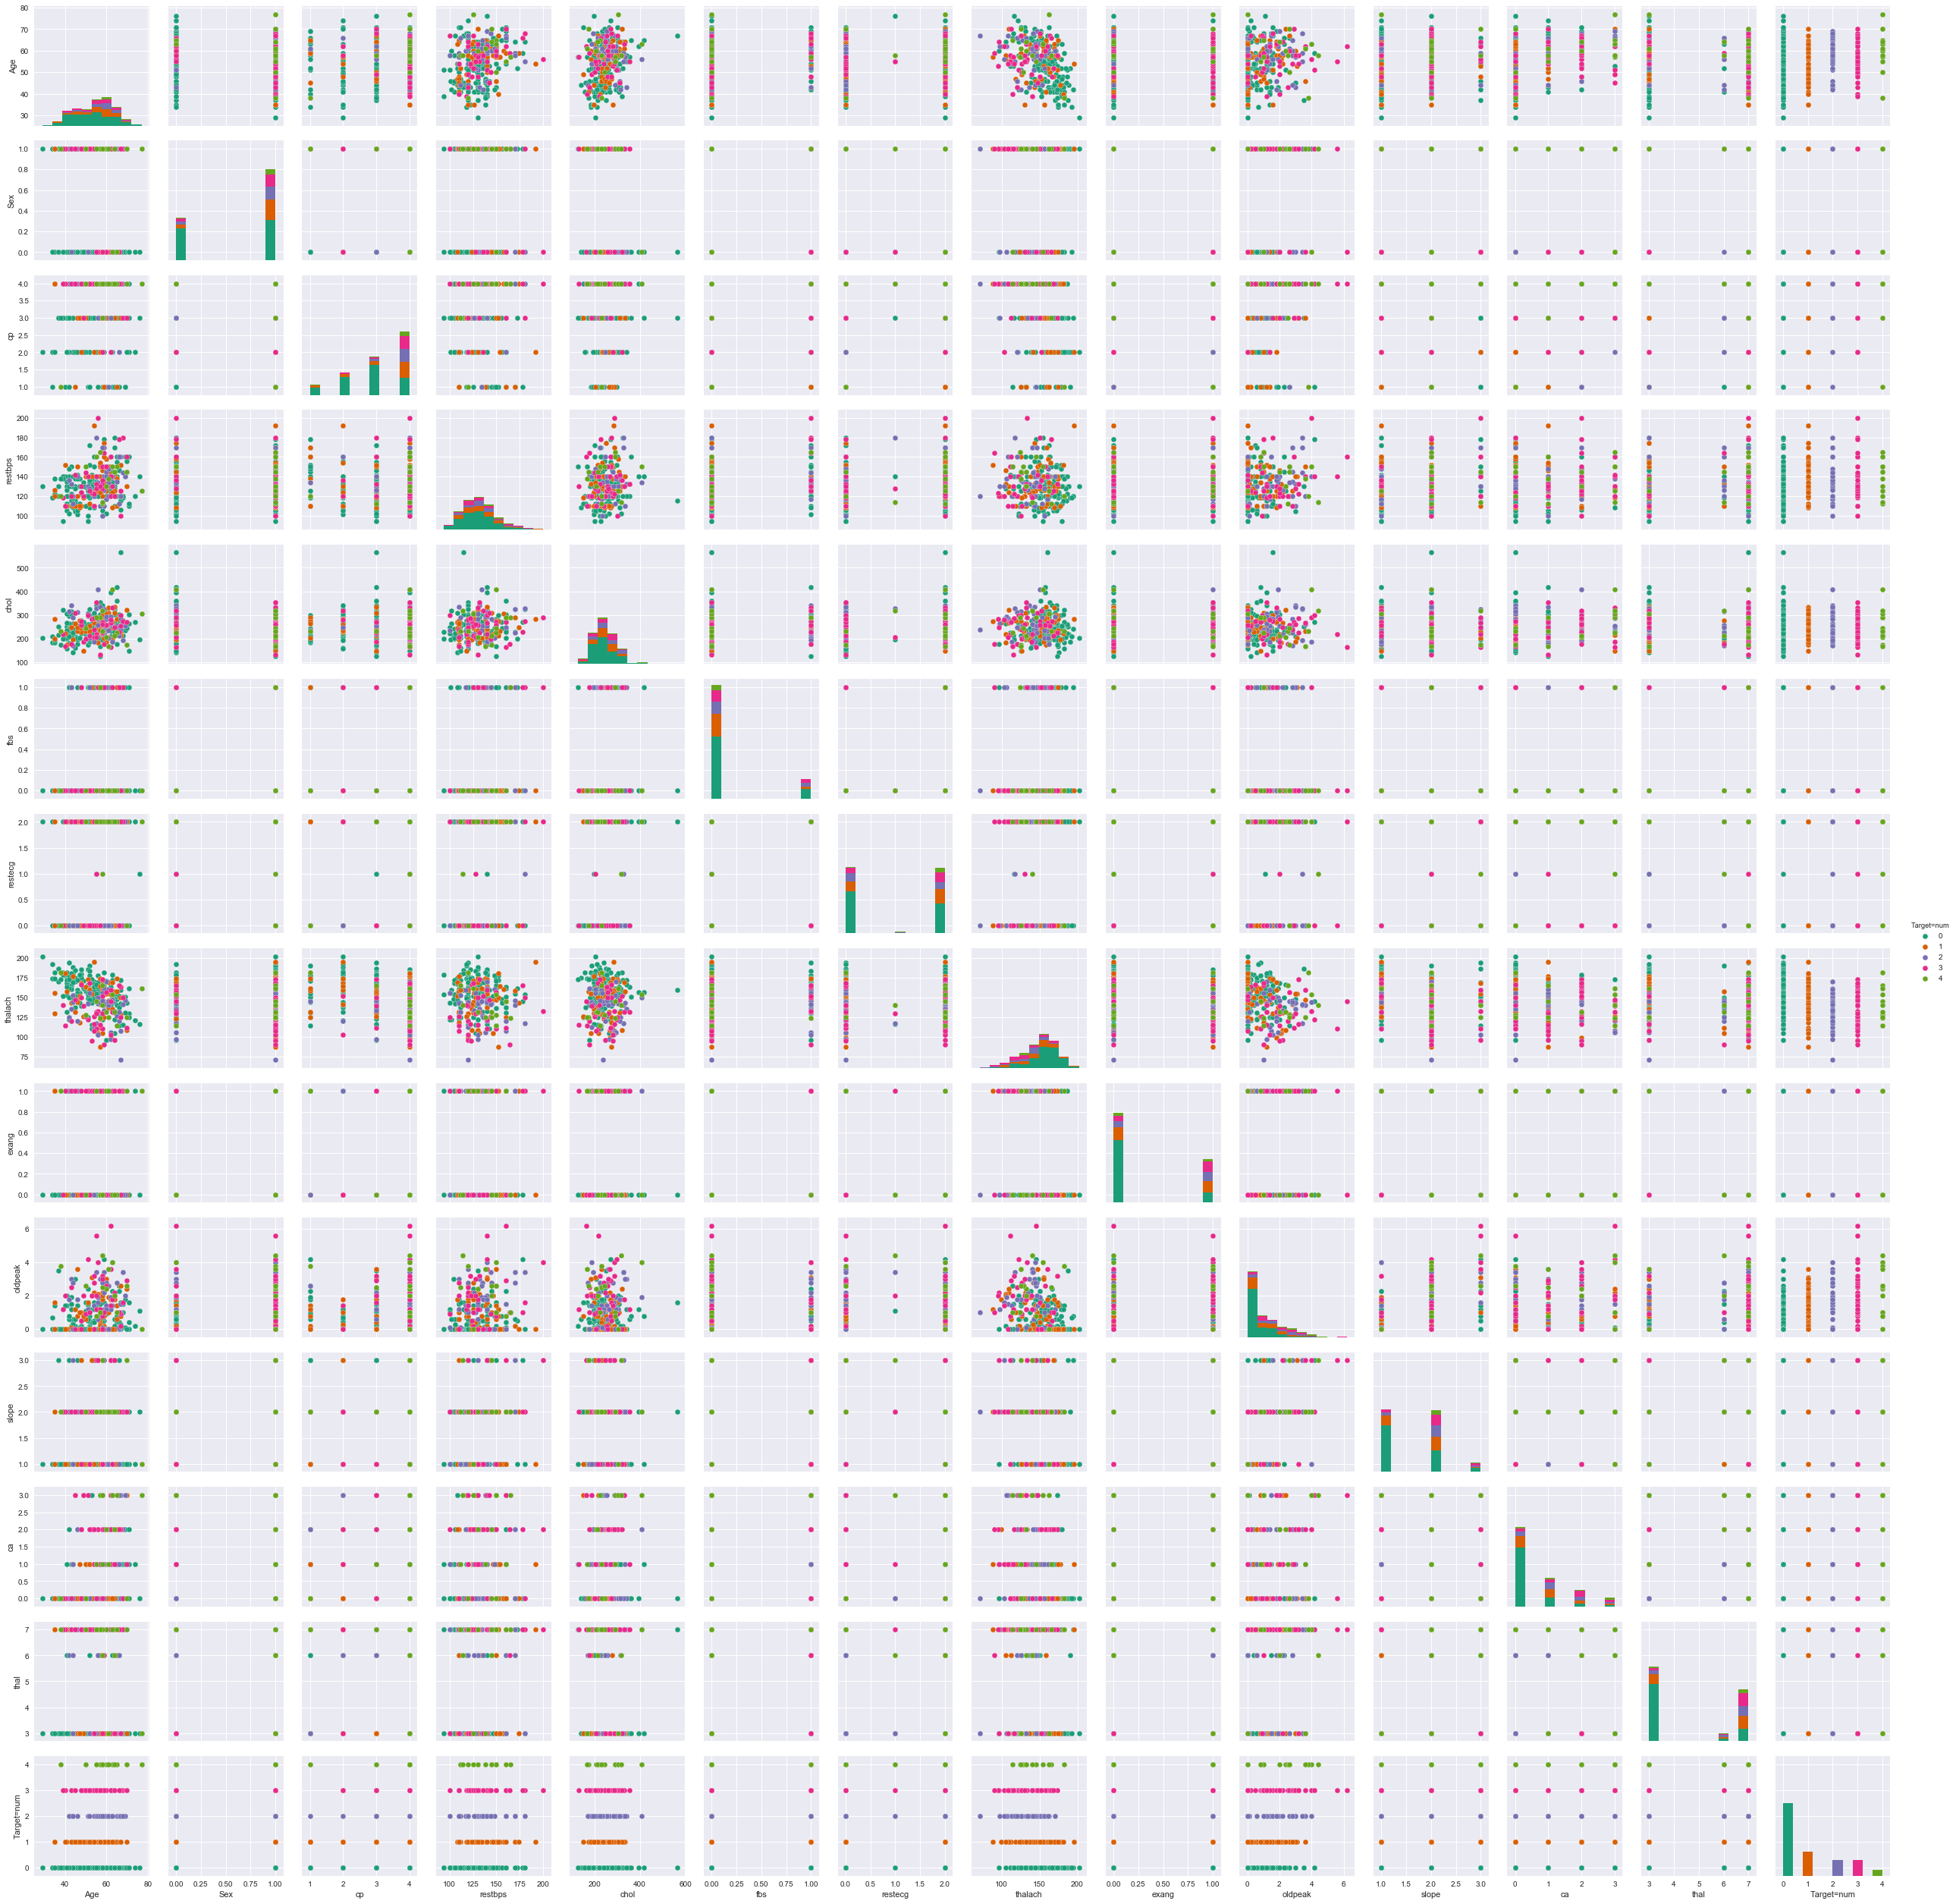

In [19]:
sns.pairplot(data, hue='Target=num',palette='Dark2')

# Train the Model

# Logistic Regression
** Split the data into training set and testing set using train_test_split**

In [20]:
X= data[['Age', 'Sex', 'cp', 'restbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']]
y= data['Target=num']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Feature Scaling: Normalization
This step is critical to ensure that no one variable dominates the other and their properties follow a standard normal distribution centered around 0.

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
X_sc = StandardScaler()

In [25]:
X_train = X_sc.fit_transform(X_train)
X_test = X_sc.transform(X_test)

** Train and fit a logistic regression model on the training set.**

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log_reg= LogisticRegression()

In [28]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the test data.**

In [29]:
log_reg_prediction = log_reg.predict(X_test)

** Evaluate the Model**

In [30]:
from sklearn.metrics import classification_report

In [31]:
#print(confusion_matrix(y_test,log_reg_prediction))
print(classification_report(y_test,log_reg_prediction))

             precision    recall  f1-score   support

          0       0.77      0.94      0.84        49
          1       0.31      0.21      0.25        19
          2       0.67      0.15      0.25        13
          3       0.30      0.43      0.35         7
          4       0.00      0.00      0.00         3

avg / total       0.60      0.60      0.57        91



In [32]:
# Calculate accuracy
from sklearn import metrics
#print(metrics.accuracy_score(y_test,log_reg_prediction))
print('The classification accuracy of the Logistic Regression model is: %.3f' %metrics.accuracy_score(y_test,log_reg_prediction))

The classification accuracy of the Logistic Regression model is: 0.604


# Observations:
The accuracy of the Logistic regression model did not do too well 

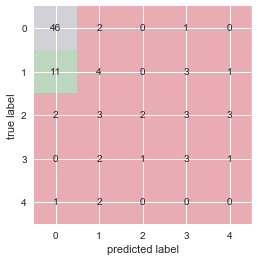

In [79]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,log_reg_prediction)
fig= plot_confusion_matrix(conf_mat=cm,figsize=(4,4),cmap='Set1',hide_spines=True)


In [65]:
print(confusion_matrix(y_test,log_reg_prediction))

[[46  2  0  1  0]
 [11  4  0  3  1]
 [ 2  3  2  3  3]
 [ 0  2  1  3  1]
 [ 1  2  0  0  0]]


In [74]:
y= pd.DataFrame(y_test)
y['Target=num'].value_counts()

0    49
1    19
2    13
3     7
4     3
Name: Target=num, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12f499e48>]], dtype=object)

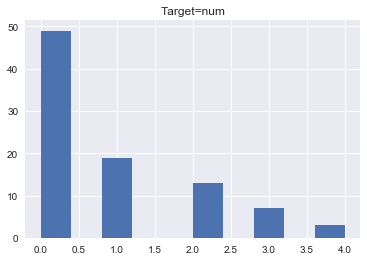

In [66]:
y.hist(bins=10)

# Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
dt_classifier = DecisionTreeClassifier()

In [82]:
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [83]:
dt_classifier_prediction = dt_classifier.predict(X_test)

In [84]:
from sklearn.metrics import classification_report 

In [85]:
print(classification_report(y_test,dt_classifier_prediction))

             precision    recall  f1-score   support

          0       0.77      0.82      0.79        49
          1       0.31      0.26      0.29        19
          2       0.38      0.23      0.29        13
          3       0.00      0.00      0.00         7
          4       0.33      0.67      0.44         3

avg / total       0.54      0.55      0.54        91



# Random Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rf_classifier = RandomForestClassifier(50)

In [88]:
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [89]:
rf_classifier_prediction = rf_classifier.predict(X_test)

In [90]:
print(classification_report(y_test,rf_classifier_prediction))

             precision    recall  f1-score   support

          0       0.69      0.94      0.79        49
          1       0.20      0.11      0.14        19
          2       0.40      0.15      0.22        13
          3       0.00      0.00      0.00         7
          4       0.00      0.00      0.00         3

avg / total       0.47      0.55      0.49        91

